# Cythosim example
Requires Python>=3.7

In [1]:
import cytosim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_fibers(fibers):
    plt.figure()
    for f in fibers:
        p = f.points()
        plt.plot(p[:,0],p[:,1])
    plt.axis('equal')
    plt.show()

# Aster simulation
Here we simulate an aster with 32 microtubules of fixed size, larger than the cell radius.

In [3]:
sim = cytosim.start("cym/aster.cym")

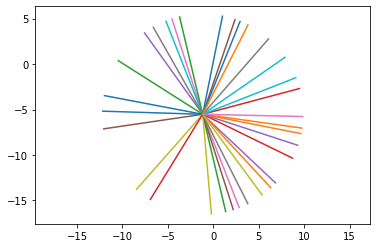

In [4]:
plot_fibers(sim.fibers)

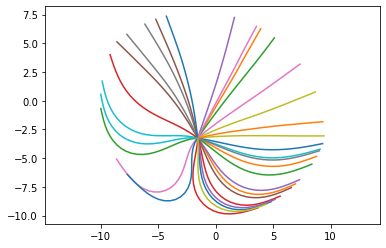

In [5]:
for t in range(100):
    sim.step()
    sim.solve()
plot_fibers(sim.fibers)

In [6]:
print(len(sim.fibers))

32


### Tinkering with the simulation live
We can join 2 microtubules into one.

In [7]:
sim.fibers[0].join(sim.fibers[1])


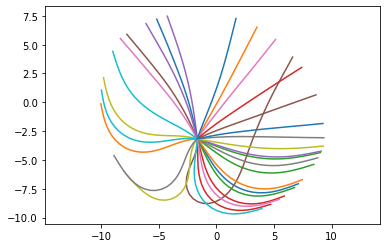

In [8]:
for t in range(20):
    sim.step()
    sim.solve()
plot_fibers(sim.fibers)

In [9]:
print(len(sim.fibers))

31


### Changing object properties
We can use the change() or change_str() method from Property.

In [10]:
sim.prop.time_step

0.001

In [11]:
sim.prop.change_str("time_step = 0.02", sim)
sim.prop.time_step

0.02